Projeto de Verão
==
Introdução a Python
--
Feito por: Silvana Barboza

In [1]:
import ccxt
import datetime
from sqlalchemy import create_engine
import sqlite3 
import poloniex

### Definindo as variáveis


In [5]:
symbol1 = 'BTC_MAID'
symbol2 = 'BTC_STR'

### Pegando os valores


In [6]:
now = datetime.datetime.now()
yearAgo = now - datetime.timedelta(days=365)

In [ ]:
data1 = poloniex.get_ohlc(symbol1, yearAgo, now)
data2 = poloniex.get_ohlc(symbol2, yearAgo, now)

### Salvando no banco de dados


In [7]:
conn = create_engine('sqlite:///summer_project.sqlite')

In [8]:
data1.to_sql(symbol1, conn, if_exists='replace')
data2.to_sql(symbol2, conn, if_exists='replace')

NameError: name 'data1' is not defined

# Gráficos


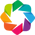

In [9]:
#---imports---#
import holoviews as hv
from holoviews.operation.timeseries import rolling
import numpy as np
import pandas as pd
hv.extension('bokeh')
hv.Dimension.type_formatters[np.datetime64] = '%m/%y'

In [10]:
##Opts
plot_opts = dict(fig_size=200, legend_position='top_left', width=700)
color_cycle = hv.Cycle(values=['#4169E1', '#2E8B57'])
hv.Store.options(backend='bokeh').Curve = hv.Options('style', color=color_cycle)

#### Pegar valores do banco de dados


In [23]:
conn = create_engine('sqlite:///summer_project.sqlite')
data1 = pd.read_sql(symbol1, conn)
data2 = pd.read_sql(symbol2, conn)

## Gráfico 1
### Relação dos preços de fechamento das moedas 


In [22]:
def close_prices(symbol, **kwargs):
    return hv.Curve(dic_data[symbol] , ('date', 'Date'), ('close', 'Close price'))

stock_symbols = [symbol1, symbol2,]
dic_data = {symbol1: data1, symbol2:data2}
dynamicMap = hv.DynamicMap(close_prices, kdims='Symbol').redim.values(Symbol=stock_symbols).opts(plot=plot_opts)

In [24]:
%%opts Curve [width=700] {+framewise}
dynamicMap

:DynamicMap   [Symbol]

### Relação entre o preço de fechamento entre as duas moedas

##### - Gráfico com mais registros, porém sem interação

In [16]:
curve1 = hv.Curve(data1[-50000:], ('date', 'Date'), ('close', 'Price'), label=symbol1)
curve2 = hv.Curve(data2[-50000:], ('date', 'Date'), ('close', 'Price'), label=symbol2)

(curve1 * curve2).opts(plot=plot_opts)

:Overlay
   .Curve.BTC_MAID :Curve   [date]   (close)
   .Curve.BTC_STR  :Curve   [date]   (close)

##### - Gráfico interativo mostrando a relacão entre o valor de fechamento das duas moedas dos últimos 2000 registros

In [17]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
def relation_curve(w, **kwargs): 
    curve1 = hv.Curve(data1[-w:], ('date', 'Date'), ('close', 'Price'), label=symbol1)
    curve2 = hv.Curve(data2[-w:], ('date', 'Date'), ('close', 'Price'), label=symbol2)
    return (curve1 * curve2).opts(plot=plot_opts)
maxSize = 2000;   
winsize = {c:relation_curve(c) for c in range(10,maxSize,50)}
hv.HoloMap(winsize, kdims='Window size')

:HoloMap   [Window size]
   :Overlay
      .Curve.BTC_MAID :Curve   [date]   (close)
      .Curve.BTC_STR  :Curve   [date]   (close)

## Gráfico 2
### Visualização dos maiores valores da moeda durante o mês

In [21]:
data1

date     close      high       low      open   quoteVolume  \
0            0  0.000151  0.000151  0.000150  0.000150  1.588612e+04   
1            1  0.000151  0.000151  0.000150  0.000150  6.672130e+02   
2            2  0.000151  0.000151  0.000150  0.000151  3.093238e+02   
3            3  0.000150  0.000151  0.000150  0.000151  3.391683e+03   
4            4  0.000151  0.000151  0.000150  0.000151  1.237342e+04   
5            5  0.000150  0.000151  0.000149  0.000151  3.271392e+04   
6            6  0.000149  0.000151  0.000149  0.000150  3.313461e+04   
7            7  0.000149  0.000150  0.000149  0.000149  3.986182e+03   
8            8  0.000151  0.000151  0.000149  0.000149  1.267658e+05   
9            9  0.000151  0.000151  0.000150  0.000150  9.758037e+03   
10          10  0.000151  0.000151  0.000151  0.000151  2.301500e+02   
11          11  0.000150  0.000151  0.000150  0.000151  2.610214e+03   
12          12  0.000150  0.000150  0.000150  0.000150  4.943923e+03   
13          13  0.000150  0.000150  0.000150  0.000150  9.606499e+03   
14          14  0.000151  0.000151  0.000150  0.000150  2.396270e+04   
15          15  0.000151  0.000151  0.000150  0.000151  1.538660e+04   
16          16  0.000151  0.000151  0.000150  0.000151  3.436910e+02   
17          17  0.000151  0.000151  0.000150  0.000151  8.057153e+03   
18          18  0.000151  0.000151  0.000150  0.000151  2.359690e+03   
19          19  0.000150  0.000151  0.000150  0.000151  1.434265e+04   
20          20  0.000150  0.000150  0.000150  0.000150  6.182983e+03   
21          21  0.000151  0.000151  0.000150  0.000150  3.110230e+04   
22          22  0.000149  0.000150  0.000149  0.000150  1.908733e+04   
23          23  0.000150  0.000150  0.000149  0.000149  7.035239e+02   
24          24  0.000150  0.000151  0.000150  0.000150  6.134273e+04   
25          25  0.000151  0.000151  0.000150  0.000150  1.078307e+03   
26          26  0.000151  0.000151  0.000150  0.000150  6.388519e+02   
27          27  0.000150  0.000151  0.000150  0.000151  8.290269e+02   
28          28  0.000151  0.000151  0.000150  0.000150  2.183008e+03   
29          29  0.000150  0.000151  0.000150  0.000150  1.181715e+03   
...        ...       ...       ...       ...       ...           ...   
105090  105090  0.000058  0.000058  0.000057  0.000057  4.544444e+02   
105091  105091  0.000058  0.000058  0.000057  0.000058  6.980134e+03   
105092  105092  0.000058  0.000058  0.000058  0.000058  8.802990e+00   
105093  105093  0.000058  0.000058  0.000058  0.000058  4.783531e+01   
105094  105094  0.000058  0.000058  0.000057  0.000058  1.184255e+03   
105095  105095  0.000058  0.000058  0.000057  0.000058  1.675764e+03   
105096  105096  0.000057  0.000058  0.000057  0.000058  1.465404e+03   
105097  105097  0.000058  0.000058  0.000057  0.000057  1.915939e+03   
105098  105098  0.000058  0.000058  0.000057  0.000058  2.712878e+03   
105099  105099  0.000058  0.000058  0.000058  0.000058  2.177984e+04   
105100  105100  0.000058  0.000058  0.000058  0.000058  2.091974e+03   
105101  105101  0.000058  0.000058  0.000058  0.000058  3.043103e+02   
105102  105102  0.000058  0.000058  0.000057  0.000058  1.541238e+03   
105103  105103  0.000057  0.000058  0.000057  0.000057  1.755745e+02   
105104  105104  0.000057  0.000057  0.000057  0.000057  1.000000e-08   
105105  105105  0.000057  0.000058  0.000057  0.000057  1.704152e+03   
105106  105106  0.000058  0.000058  0.000057  0.000057  2.213529e+02   
105107  105107  0.000058  0.000058  0.000058  0.000058  9.560017e+02   
105108  105108  0.000057  0.000058  0.000057  0.000058  3.652925e+04   
105109  105109  0.000057  0.000057  0.000057  0.000057  8.855022e+02   
105110  105110  0.000057  0.000057  0.000057  0.000057  4.152160e-03   
105111  105111  0.000057  0.000057  0.000057  0.000057  3.627691e+02   
105112  105112  0.000058  0.000058  0.000058  0.000058  3.345000e-05   
105113  105113  0.000058  0.000058  0.000058  0.00

In [18]:
def get_highest_value_by_month(dataframe):
    df = pd.DataFrame(dataframe)
    df['month'] = df.date.dt.to_period('M')
    groupDf = df.groupby(['month'], sort=False, as_index=False)['high'].max()
    groupDf['date'] = groupDf['month'].map(lambda x: x.to_timestamp())
    return groupDf


In [19]:
def get_highest_value_by_day(dataframe):
    df = pd.DataFrame(dataframe)
    df['day'] = df.date.dt.to_period('d')
    groupDf = df.groupby(['day'], sort=False, as_index=False)['high'].max()
    groupDf['date'] = groupDf['day'].map(lambda x: x.to_timestamp())
    return groupDf

In [20]:
%%opts Curve [width=200, height=100, show_grid=True] {+framewise}
def load_bars(symbol, **kwargs):
    curve = hv.Curve(get_highest_value_by_month(dic_data[symbol]), ('date', 'Date'), ('high', 'Price'), label=symbol1)
    return hv.Bars(curve)

stock_symbols = [symbol1, symbol2,]
dic_data = {symbol1: data1, symbol2:data2}
plot_opts = dict( width=500)
dynamicMap = hv.DynamicMap(load_bars, kdims='Symbol').redim.values(Symbol=stock_symbols).opts(plot=plot_opts)
dynamicMap

Invoked as load_bars(symbol='BTC_MAID')
Invoked as dynamic_operation('BTC_MAID')
Invoked as dynamic_operation('BTC_MAID')


AttributeError: Can only use .dt accessor with datetimelike values

:DynamicMap   [Symbol]

In [ ]:
bars

In [107]:
curve1 = hv.Curve(get_highest_value_by_month(data1), ('date', 'Date'), ('high', 'Price'), label=symbol1)
bars1 = hv.Bars(curve1)

curve2 = hv.Curve(get_highest_value_by_month(data2), ('date', 'Date'), ('high', 'Price'), label=symbol2)
bars2 = hv.Bars(curve2)

print("Maior valor da moeda mensal")
(bars1 + bars2).opts(plot=plot_opts)

dynamicMap = hv.DynamicMap(load_symbol, kdims='Symbol').redim.values(Symbol=stock_symbols).opts(plot=plot_opts)

AttributeError: 'DataFrame' object has no attribute 'date'

## Gráfico 3
### Relação entre o maior e o menor preço de venda no mês

In [29]:
def get_lowest_value_by_month(dataframe):
    df = pd.DataFrame(dataframe)
    df['month'] = df.date.dt.to_period('M')
    groupDf = df.groupby(['month'], sort=False, as_index=False)['low'].min()
    groupDf['date'] = groupDf['month'].map(lambda x: x.to_timestamp())
    return groupDf

In [60]:
list = []
list.append(hv.Area(hv.Curve(get_highest_value_by_month(data1), 'date', 'high', label=symbol1)))
list.append(hv.Area(hv.Curve(get_lowest_value_by_month(data1), 'date', 'low', label=symbol1)))

list.append(hv.Area(hv.Curve(get_highest_value_by_month(data2), 'date', 'high', label=symbol2)))
list.append(hv.Area(hv.Curve(get_lowest_value_by_month(data2), 'date', 'low', label=symbol2)))

In [65]:
print("Gráfico do " + str(symbol1))
(list[0] * list[1]).opts(plot=plot_opts)

Gráfico do BTC_MAID


:Overlay
   .Area.BTC_MAID.I  :Area   [date]   (high)
   .Area.BTC_MAID.II :Area   [date]   (low)

In [66]:
print("Gráfico do " + str(symbol2))
(list[2] * list[3]).opts(plot=plot_opts)

Gráfico do BTC_STR


:Overlay
   .Area.BTC_STR.I  :Area   [date]   (high)
   .Area.BTC_STR.II :Area   [date]   (low)

## Gráfico 4
### Volume de Diário

In [53]:
def get_sum_volume_by_day(dataframe):
    df = pd.DataFrame(dataframe)
    df['day'] = df.date.dt.to_period('d')
    groupDf = df.groupby(['day'], sort=False, as_index=False)['volume'].sum()
    groupDf['date'] = groupDf['day'].map(lambda x: x.to_timestamp())
    return groupDf


In [42]:
def get_volume_by_hour(dataframe):
    df = pd.DataFrame(dataframe)
    df['hour'] = df.date.dt.to_period('h')
    print(df.date.dt.to_period('h'))
    groupDf = df.groupby(['hour'], sort=False, as_index=False)['volume']
    groupDf['date'] = groupDf['hour'].map(lambda x: x.to_timestamp())
    return groupDf

In [50]:
def get_one_month_data(dataframe):
    today = datetime.datetime.today()
    monthAgo = now - datetime.timedelta(days=30)
    dataframe.index = dataframe['date']
    return dataframe[monthAgo: today]   

In [59]:
graph4_opts = dict(fig_size=200, legend_position='top_left')

curveSumVolume1 = hv.Curve(get_sum_volume_by_day(data1), 'date', 'volume', label=symbol1).opts(plot=graph4_opts)
curveSumVolume2= hv.Curve(get_sum_volume_by_day(data2), 'date', 'volume', label=symbol2).opts(plot=graph4_opts)

curveSumVolume1 + curveSumVolume2

:Layout
   .Curve.BTC_MAID :Curve   [date]   (volume)
   .Curve.BTC_STR  :Curve   [date]   (volume)

## Gráfico 5
### Hora do menor valor do dia dos últimos 30 dias

In [79]:
def get_lowest_value_by_day(dataframe):
    df = pd.DataFrame(dataframe)
    df['day'] = df.date.dt.to_period('d')
    groupDf = df.groupby(['day'], sort=False)['low'].max()
    df['count_max'] = df.groupby(['day'])['low'].transform(max)
    df['time'] = df.date.dt.time
    return df[df['low'] == df['count_max']]

In [105]:
lowest1 = get_lowest_value_by_day(get_one_month_data(data1))
lowest2 = get_lowest_value_by_day(get_one_month_data(data2))

scatterOpts = dict(fig_size=200, legend_position='top_left', xrotation=360)
(hv.Scatter(lowest1, 'date', 'time', label=symbol1)).opts(plot=scatterOpts)

:Scatter   [date]   (time)